In [18]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import seaborn as sns
from scipy.spatial import KDTree
import numpy as np

In [19]:
df = pd.read_csv('stastics_Sat_Dec__2_11_33_29_2023.hpo.csv')

In [20]:
df_repeat = pd.read_csv('stastics_Sun_Dec__3_23_02_37_2023_LA.csv')

In [3]:
df

,index,accuracy,find_count,total_count,hash_functions,bloomfilter_size,f,p,q,precision,e_p,e_1
0,1,0.790,790,1000,1,32,0.1,0.1,0.10,3,5.888878,0.000000
1,2,0.804,804,1000,1,32,0.1,0.1,0.15,3,5.888878,0.180408
2,3,0.796,796,1000,1,32,0.1,0.1,0.20,3,5.888878,0.314872
3,4,0.772,772,1000,1,32,0.1,0.1,0.25,3,5.888878,0.424529
4,5,0.766,766,1000,1,32,0.1,0.1,0.30,3,5.888878,0.519137
...,...,...,...,...,...,...,...,...,...,...,...,...
69979,69980,0.561,561,1000,6,256,0.9,0.9,0.75,4,2.408049,-0.270867
69980,69981,0.560,560,1000,6,256,0.9,0.9,0.80,4,2.408049,-0.204438
69981,69982,0.531,531,1000,6,256,0.9,0.9,0.85,4,2.408049,-0.119135
69982,69983,0.535,535,1000,6,256,0.9,0.9,0.90,4,2.408049,0.000000


In [10]:
main_col = df[['accuracy', 'bloomfilter_size','precision', 'hash_functions','f','p','q']];

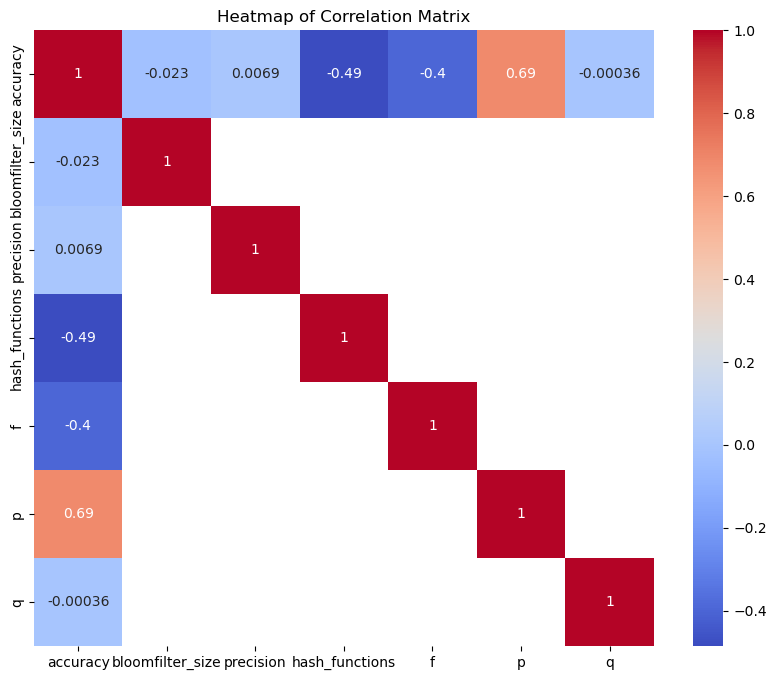

In [11]:
correlation_matrix = main_col.corr()
mask = abs(correlation_matrix) > 0.00000001

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=~mask)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming `data` is your DataFrame and 'accuracy' is your target column
X = main_col.drop('accuracy', axis=1)
y = main_col['accuracy']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [13]:
importances = model.feature_importances_


In [14]:
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)


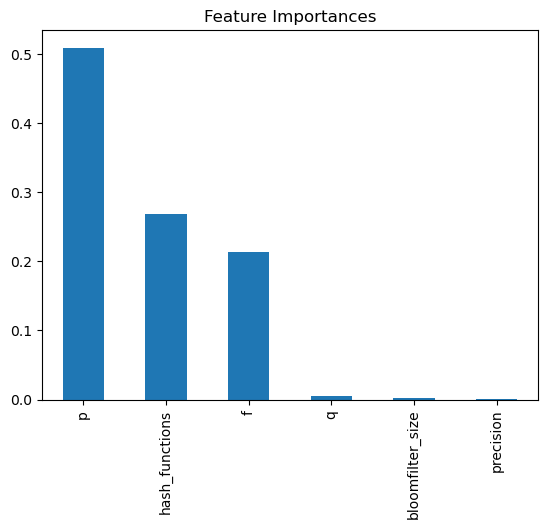

In [15]:
import matplotlib.pyplot as plt

feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.show()


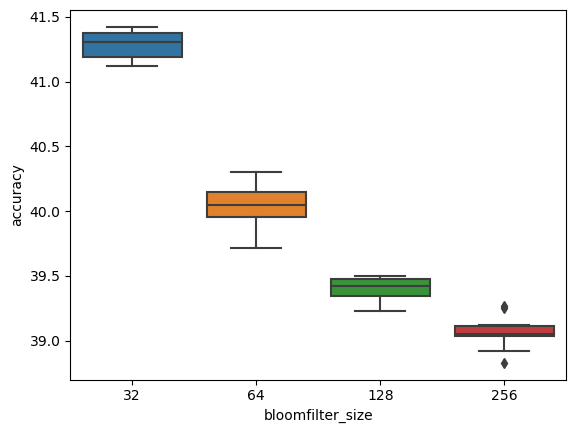

In [21]:
sns.boxplot(x = "bloomfilter_size", y = "accuracy",  data = df_repeat)
plt.show()

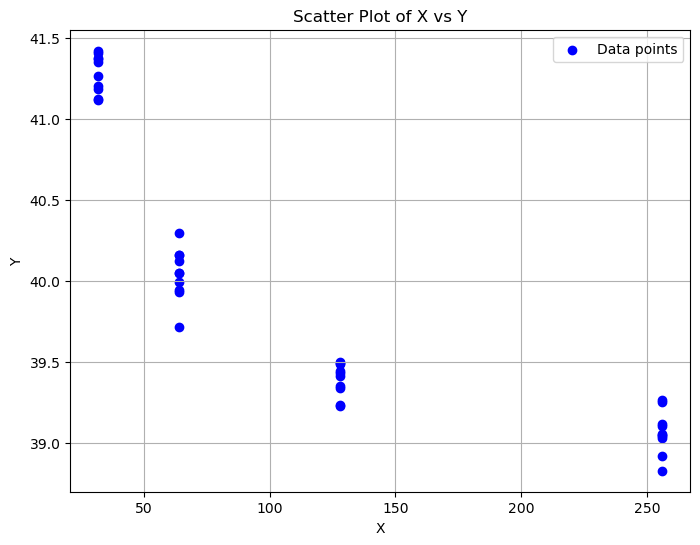

In [22]:
x = df_repeat['bloomfilter_size']
y = df_repeat['accuracy']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, marker='o', color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of X vs Y')
plt.grid(True)
plt.legend()
plt.show()

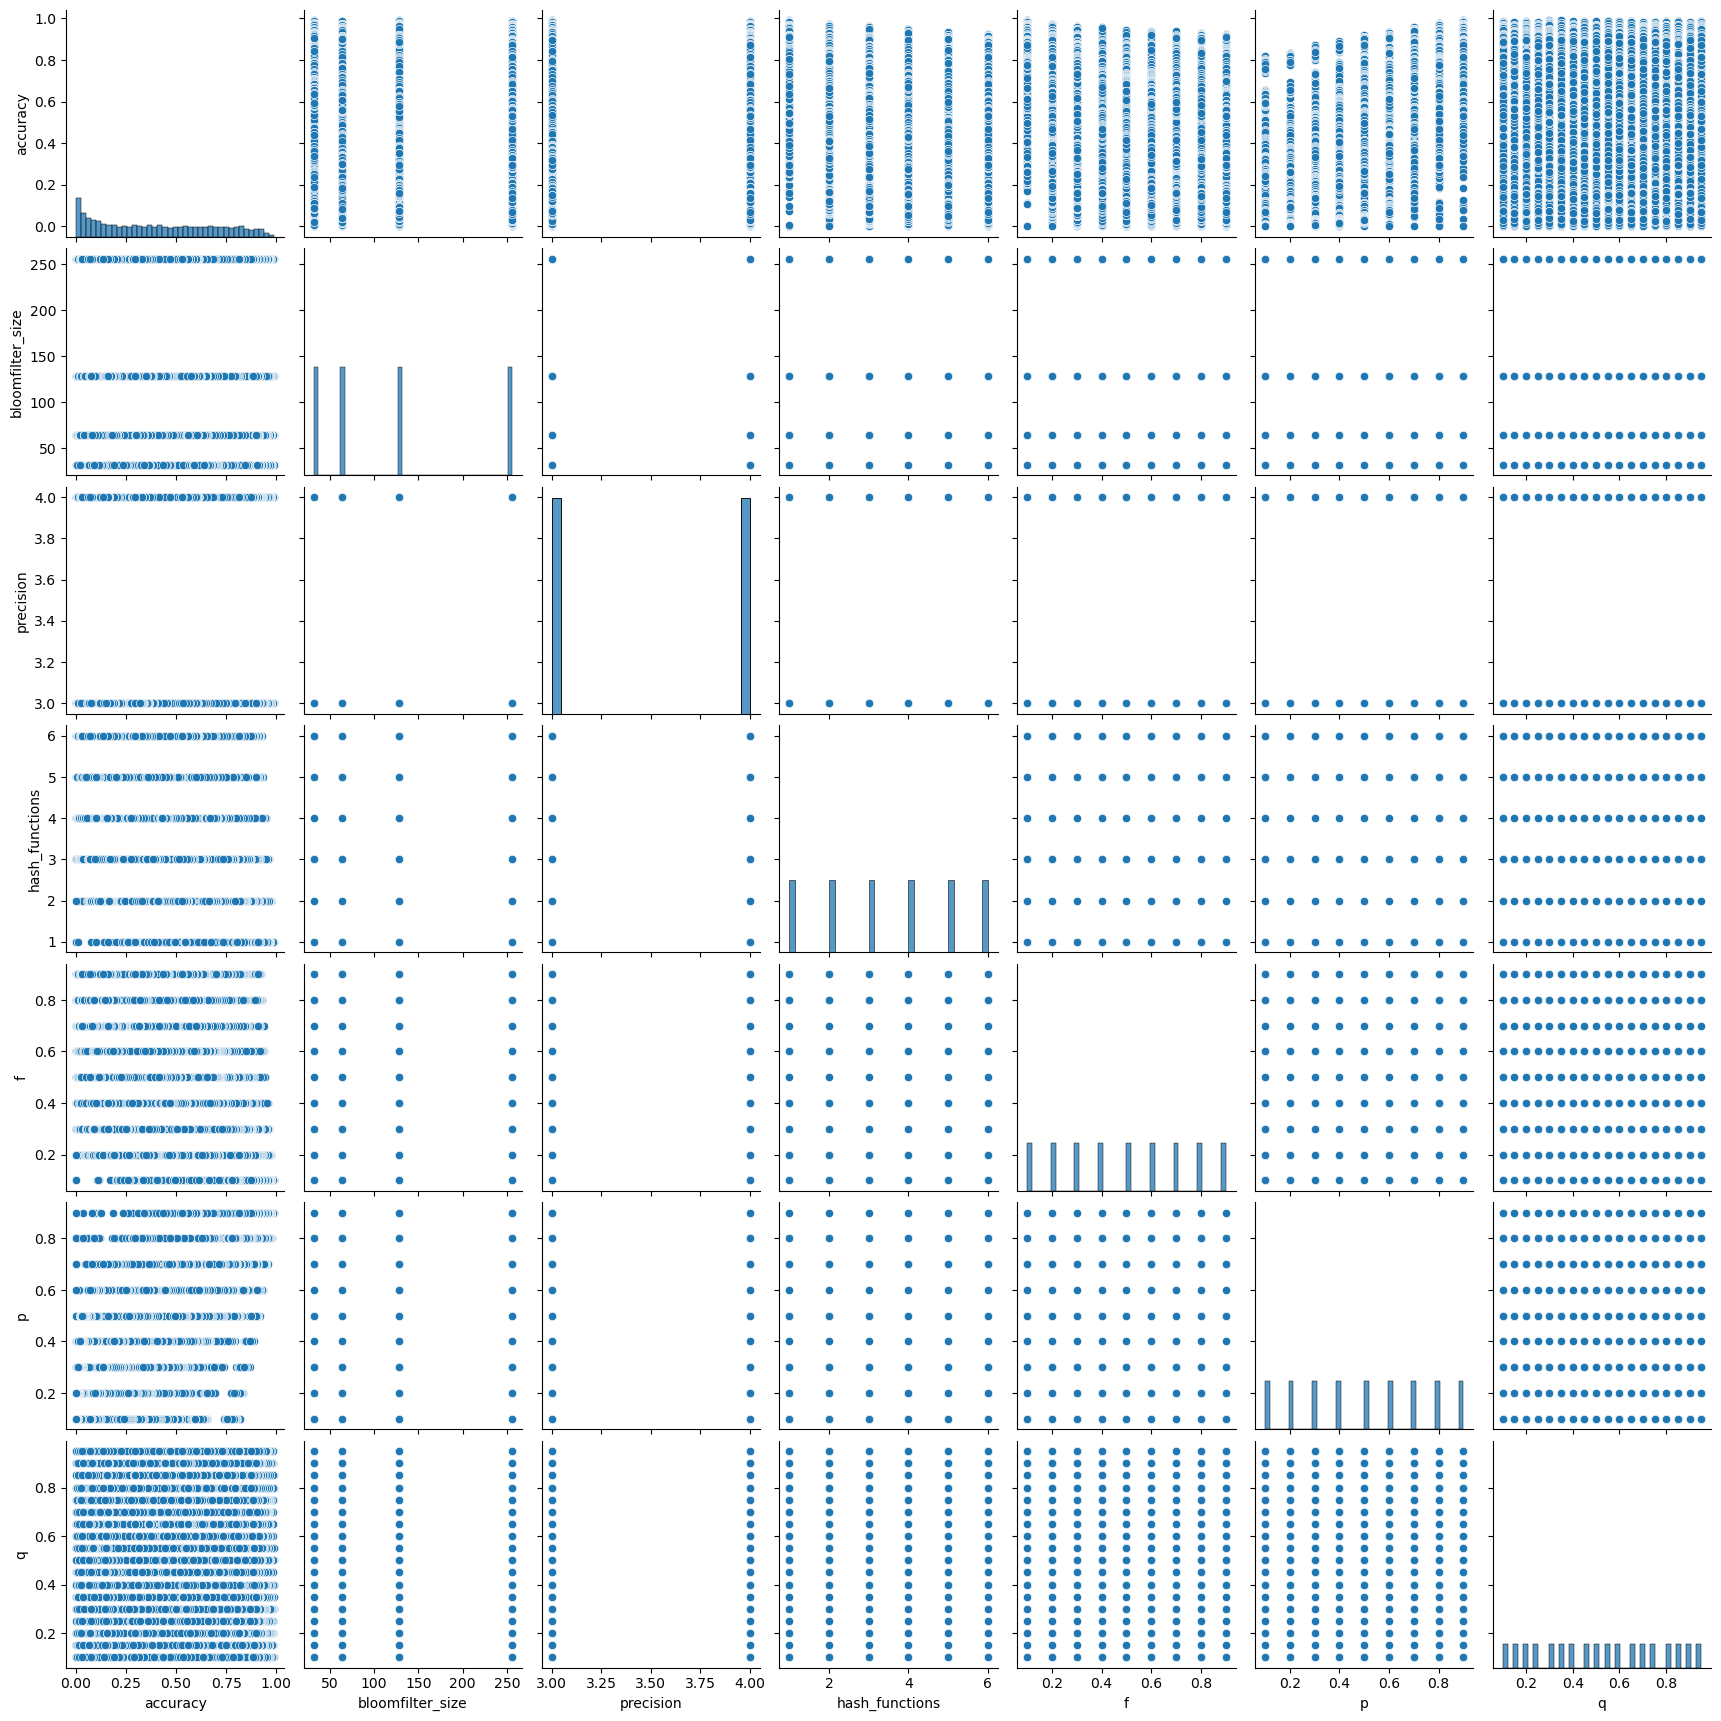

In [23]:
sns.pairplot(main_col)